In [2]:

import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

In [3]:
%matplotlib inline

In [4]:
# get birds-eye from env
def render_birds_eye(my_env):
    viewer = my_env.unwrapped.viewer
    camera_id = 0
    camera_distance = 0.8
    camera_azimuth = 0
    camera_elevation = -90
    
    if viewer is not None:
        viewer.cam.lookat[0] = 0
        viewer.cam.lookat[1] = 0
        viewer.cam.lookat[2] = 0
        viewer.cam.distance = camera_distance
        viewer.cam.azimuth = camera_azimuth
        viewer.cam.elevation = camera_elevation

    return my_env.render()

# get birds-eye from vec_env
def new_render(my_vec_env, my_env):
    # Retrieve qpos and qvel from the simulation
    qpos = my_vec_env.envs[0].env.unwrapped.data.qpos.flat.copy()
    qvel = my_vec_env.envs[0].env.unwrapped.data.qvel.flat.copy()
    my_env.unwrapped.set_state(qpos, qvel)
    return render_birds_eye(my_env)
    


In [5]:
# just for notebook format
os.environ['LD_LIBRARY_PATH'] = "/data/pulkitag/misc/spiridea/.mujoco/mujoco210/bin:/usr/lib/nvidia"
os.environ['MUJOCO_PY_MUJOCO_PATH'] = "/data/pulkitag/misc/spiridea/.mujoco/mujoco210"
os.environ['MUJOCO_GL'] = 'egl'
os.environ['PYOPENGL_PLATFORM'] = 'egl'

In [5]:

# load expert model for reacher
model = PPO.load("ppo_reacher_expert")


In [8]:
env = gym.make("Reacher-v4", render_mode = 'rgb_array')
vec_env = make_vec_env("Reacher-v4", n_envs=4)
env.reset()
env.render()

Import error. Trying to rebuild mujoco_py.


/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /lib/x86_64-linux-gnu/libc.so.6: unsupported GNU_PROPERTY_TYPE (5) t

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)

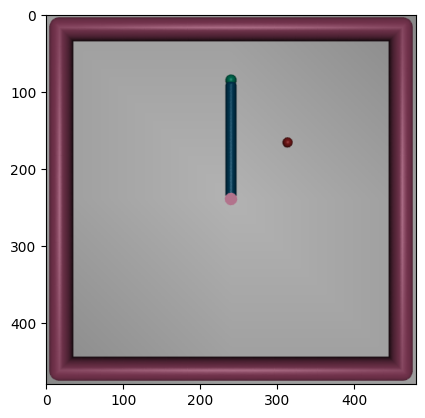

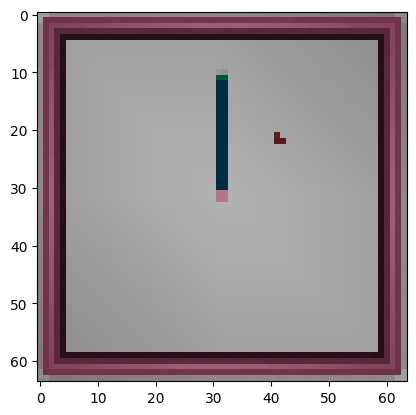

In [29]:
# Retrieve qpos and qvel from the simulation
image = new_render(vec_env, env)
plt.imshow(image)
plt.show()
plt.imshow(cv2.resize(image, (64, 64)))

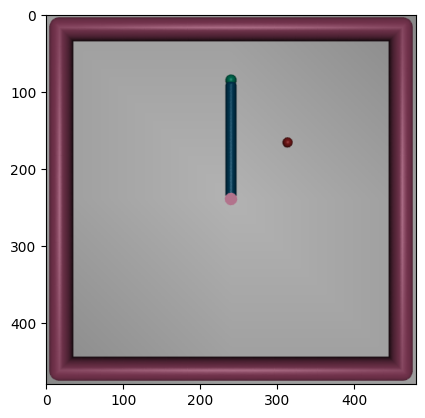

In [31]:
plt.imshow(render_birds_eye(env))

In [ ]:
env = gym.make("Reacher-v4", render_mode = 'rgb_array')
print(env)
obs = env.reset()[0]
for t in range(55):
    print(t)
    print('hello')
    print(obs)
    action = model.predict(obs)[0]
    obs, reward, terminated, truncated, info= env.step(action)
    print(terminated, truncated)
    plt.imshow(render_birds_eye(env))
    plt.show()
    

In [76]:

env.reset()
env.step(action)

(array([ 0.99680494,  0.99974124, -0.0798744 ,  0.02274749, -0.15526549,
        -0.12271926, -0.05882379, -0.12780565,  0.36476603,  0.10844226,
         0.        ]),
 -0.3819690383859937,
 False,
 False,
 {'reward_dist': -0.3806322330963825, 'reward_ctrl': -0.0013368053})

In [47]:
import pickle

In [48]:
# open pickle file
with open('reacher_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [49]:
data[0][0].shape

(64, 64, 3)

In [50]:
data[0][1]

array([ 0.99944305,  0.99541453,  0.03337051, -0.09565516,  0.16459244,
        0.00473567,  0.00252209, -0.00277171,  0.04513761, -0.0082609 ,
        0.        ])

In [51]:
print('hello')

hello


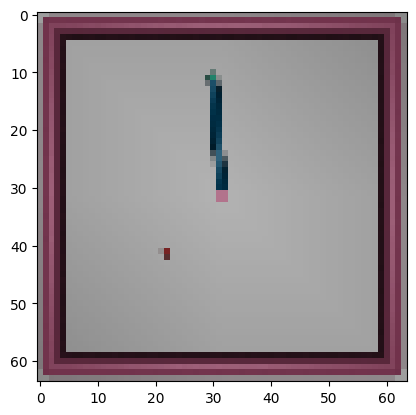

In [52]:
plt.imshow(data[100][0])

In [53]:
data[100][1]

array([ 9.97337675e-01,  9.99985334e-01,  7.29216149e-02,  5.41594256e-03,
       -9.89622121e-02,  9.76886554e-02, -1.81974052e-04,  1.51757431e-03,
        3.08358072e-01, -8.17810663e-02,  0.00000000e+00])

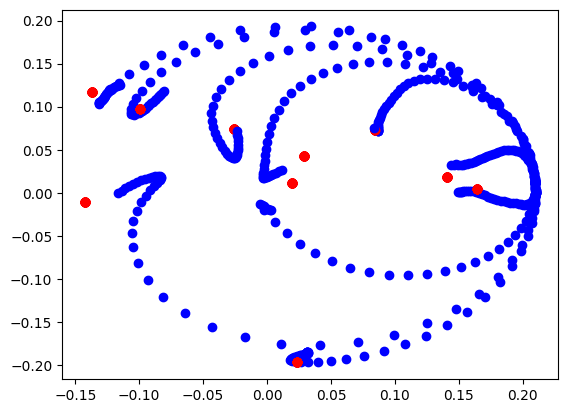

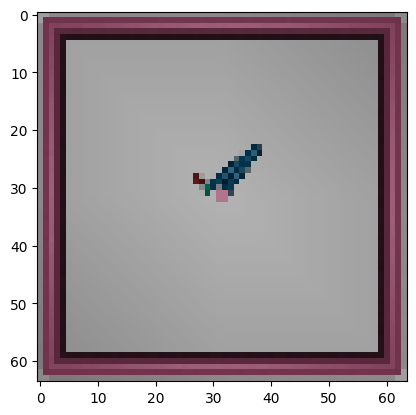

In [61]:
for i in range(500):
    target_x = data[i][1][4]
    target_y = data[i][1][5]
    true_x = data[i][1][8]
    true_y = data[i][1][9]
    plt.scatter(target_x, target_y, c='r')
    plt.scatter(true_x + target_x, true_y + target_y, c='b')
plt.show()
plt.imshow(data[i][0])

In [62]:
len(data)

50000

In [74]:
data[500][1]

array([ 0.99581626,  0.99631391,  0.09137816, -0.08578222,  0.00833828,
       -0.1784941 ,  0.00486477, -0.00260224,  0.20124162,  0.18824989,
        0.        ])

In [86]:
data[1][0].shape

(64, 64, 3)

In [6]:
env = gym.make("Reacher-v4", render_mode = 'rgb_array')
env.reset()

Import error. Trying to rebuild mujoco_py.


/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /lib/x86_64-linux-gnu/libc.so.6: unsupported GNU_PROPERTY_TYPE (5) t

(array([ 9.99103973e-01,  9.99991790e-01,  4.23231761e-02,  4.05209259e-03,
        -1.96837551e-02,  1.08264786e-01,  8.68019495e-04, -2.34903806e-03,
         2.29475822e-01, -9.89316264e-02,  0.00000000e+00]),
 {})

In [10]:
import pickle
#open pkl file
with open('demos.pkl', 'rb') as f:
    demos_data = pickle.load(f)

with open('in_dist_goals.pkl', 'rb') as f:
    in_dist_goals = pickle.load(f)

with open('ood_goals.pkl', 'rb') as f:
    ood_goals = pickle.load(f)

In [35]:
# run simulations to build dataset
def run_simulations(model, env, num_simulations = 100):
    reacher_full_demo_data = []
    for i in range(num_simulations):
        traj_obs = []
        traj_actions = []
        traj_next_obs = []
        if i % 10 == 0:
            print(f'Running simulation {i}...')
        obs = env.reset()[0]
        for t in range(49):
            action = model.predict(obs)[0]
            next_obs, reward, terminated, truncated, info = env.step(action)
            traj_obs.append(obs)
            traj_actions.append(action)
            traj_next_obs.append(next_obs)
            if terminated or truncated:
                break
            obs = next_obs
        traj_obs = np.array(traj_obs)
        traj_actions = np.array(traj_actions)
        traj_next_obs = np.array(traj_next_obs)
        reacher_full_demo_data.append({'obs': traj_obs, 'action': traj_actions, 'next_obs': traj_next_obs})
    return reacher_full_demo_data

In [36]:
model = PPO.load("ppo_reacher_expert")
run_simulations(model, env)

Running simulation 0...
Running simulation 10...
Running simulation 20...
Running simulation 30...


KeyboardInterrupt: 

In [32]:
demos_data[0].keys()
#1000 examples of obs, action, next_obs

dict_keys(['obs', 'action', 'next_obs'])

In [26]:
in_dist_goals[0]
#50 examples of in distribution goals

array([0.19941504, 0.67405079, 0.01      ])

In [23]:
ood_goals[0]
#50 examples of out of distribution goals

array([-0.245503  ,  0.64378595,  0.01      ])

In [28]:
demos_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [25]:
ood_goals

array([[-0.245503  ,  0.64378595,  0.01      ],
       [-0.2977597 ,  0.68750283,  0.01      ],
       [-0.201339  ,  0.67184985,  0.01      ],
       [-0.23878173,  0.57195453,  0.01      ],
       [-0.06816671,  0.55878307,  0.01      ],
       [-0.1126312 ,  0.51008958,  0.01      ],
       [-0.00707807,  0.6958493 ,  0.01      ],
       [-0.19914103,  0.69612833,  0.01      ],
       [-0.17556931,  0.68462018,  0.01      ],
       [-0.06344265,  0.64753018,  0.01      ],
       [-0.01421326,  0.60382321,  0.01      ],
       [-0.0186782 ,  0.53772109,  0.01      ],
       [-0.18179948,  0.51000773,  0.01      ],
       [-0.04031015,  0.69593619,  0.01      ],
       [-0.29555643,  0.53427364,  0.01      ],
       [-0.24455836,  0.57452157,  0.01      ],
       [-0.06668621,  0.51357901,  0.01      ],
       [-0.07602721,  0.61685322,  0.01      ],
       [-0.21866078,  0.53577976,  0.01      ],
       [-0.12664632,  0.52628874,  0.01      ],
       [-0.26042591,  0.55386619,  0.01 